This is the MNIST digit problem, but using the Tensor Flow system instead of the scikit-learn version

Tensorflow is the package from Google for machine learning,  the most common pro level tool for ML

The other prominent package for machine learning is called pytorch, we may look at that package later in the semester.  Tensorflow is more common for applications,  pytorch is more of an R&D
tool

In [1]:
from tensorflow.keras.datasets import mnist

[train_images,train_labels],[test_images,test_labels]=mnist.load_data(path="D:\\Example_data\\MNIST\mnist.npz")

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

Note the different storage format, as 28 by 28 images,  not flat arrays this time

# Building an ML model using the Keras sequential model
we define the model,  called network here,  with the line models.Sequential()

and then we add layers to it,   specifying the numbers of neuron in the layer, the activation function and the size of the input data in the first layer

in the output layer, we are using a softmax activation,  so the outputs scale from 0 to 1, and sum to one

Notice how much control we have on the model using the keras API in tensorflow to construct the model

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

network=models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

Below is a deeper alternative model,   don't run this cell the first time through the notebook,   come back to this book when
you reach the end and run it from here to see a more complex model in action

In [4]:
# alternative model- don't run this the first time!   This model adds another layer,  reducing the size of the first layer

network=models.Sequential()
network.add(layers.Dense(128,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(8,activation='relu'))
network.add(layers.Dense(10,activation='softmax'))

This is the set of instructions on how we want to see the model fitted.   The loss function and optimizer are specified here
and we can also indicate that we want performance metrics calculated as this model is trained

In [5]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy','AUC'])

We are using a keras utility to convert the test labels to onehot encodings

In [6]:
from tensorflow.keras.utils import to_categorical

test_labels=to_categorical(test_labels)
train_labels=to_categorical(train_labels)

In [7]:
test_labels.shape

(10000, 10)

We are going to reshape the images to the flat form,and also rescale them to the range 0 to 1,  and also convert them to 32 bit float to save a bit of space

In [8]:
train_images=train_images.reshape(60000,28*28)
train_images=train_images.astype('float32')/255

We will now split the training set into a test set 2 and a validation set.   We will fit the model using the second training set and use the validation set to test
the models during the model adjustment process

In [9]:
from sklearn.model_selection import train_test_split

X_train2, X_valid, y_train2, y_valid = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [10]:
print(X_train2.shape)
print(X_valid.shape)
print(y_train2.shape)
print(y_valid.shape)

(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


In [11]:
print(train_images.shape)

(60000, 784)


# Model fitting

here is the model fitting process, running for 30 epochs, with a batch size of 512 points

The validation set will be used at the end of each epoch, and the metrics reported

The metrics will all be stored in history

In [12]:
history=network.fit(X_train2,y_train2,epochs=30,batch_size=512, validation_data=(X_valid,y_valid))


Epoch 1/30
94/94 [==============================] - 6s 43ms/step - loss: 1.2104 - accuracy: 0.6558 - auc: 0.9176 - val_loss: 0.8057 - val_accuracy: 0.7974 - val_auc: 0.9645
Epoch 2/30
94/94 [==============================] - 2s 24ms/step - loss: 0.6700 - accuracy: 0.8024 - auc: 0.9744 - val_loss: 0.5430 - val_accuracy: 0.8126 - val_auc: 0.9833
Epoch 3/30
94/94 [==============================] - 2s 17ms/step - loss: 0.4338 - accuracy: 0.8810 - auc: 0.9887 - val_loss: 0.3058 - val_accuracy: 0.9268 - val_auc: 0.9925
Epoch 4/30
94/94 [==============================] - 2s 19ms/step - loss: 0.2626 - accuracy: 0.9313 - auc: 0.9942 - val_loss: 0.2311 - val_accuracy: 0.9369 - val_auc: 0.9952
Epoch 5/30
94/94 [==============================] - 1s 11ms/step - loss: 0.2099 - accuracy: 0.9425 - auc: 0.9959 - val_loss: 0.2049 - val_accuracy: 0.9420 - val_auc: 0.9958
Epoch 6/30
94/94 [==============================] - 1s 11ms/step - loss: 0.1790 - accuracy: 0.9507 - auc: 0.9967 - val_loss: 0.1782 - v

In [13]:
test_loss,test_accuracy,test_AUC=network.evaluate(X_train2,y_train2)
print('test acc:',test_accuracy)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.0241 - accuracy: 0.9937 - auc: 0.9999
test acc: 0.9936875104904175


In [14]:
print('test AUC',test_AUC)

test AUC 0.9998984932899475


# Question

This is the MNIST digits problem, using a bit more advanced neural net than we did with data set
earlier.

But what is claimed performance level look like?    How does it compare with your earlier results?   Is this reasonable?

# Now some plots using the history

We can look at the loss function for the training data and the loss function for the cross validation level as a function of the number of training epochs run.

Note that this notebook has two different models, watch what changes the second time we run this
notebook using the more complex model.

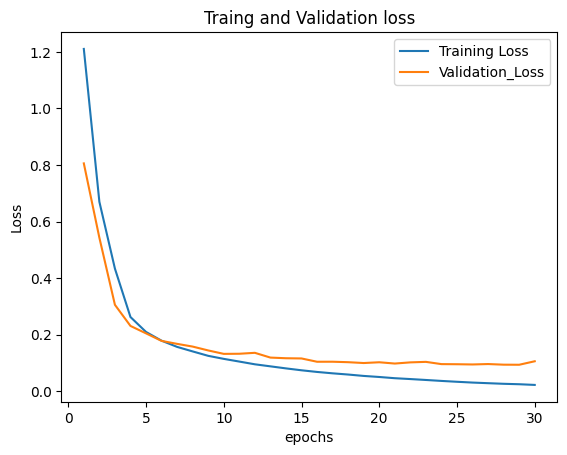

In [15]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epoch=range(1,len(loss_values)+1)

plt.plot(epoch,loss_values,label='Training Loss')
plt.plot(epoch,val_loss_values,label="Validation_Loss")
plt.title("Traing and Validation loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


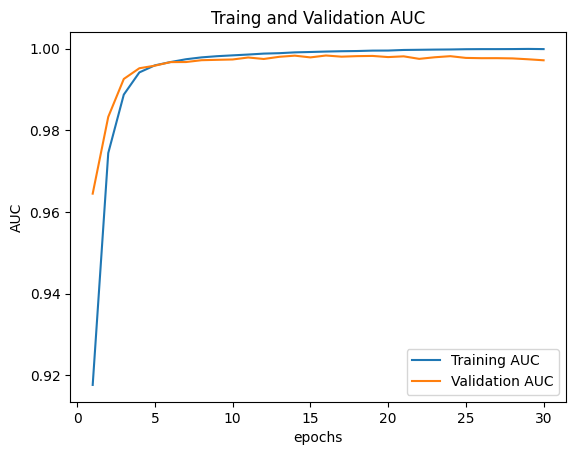

In [16]:
AUC=history_dict['auc']
val_AUC=history_dict['val_auc']


plt.plot(epoch,AUC,label='Training AUC')
plt.plot(epoch,val_AUC,label="Validation AUC")
plt.title("Traing and Validation AUC")
plt.xlabel("epochs")
plt.ylabel("AUC")
plt.legend()
plt.show()


In [17]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])

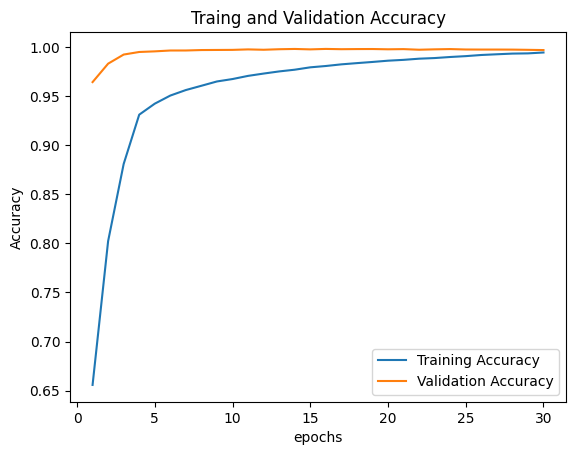

In [18]:
ACC=history_dict['accuracy']
val_ACC=history_dict['val_accuracy']


plt.plot(epoch,ACC,label='Training Accuracy')
plt.plot(epoch,val_AUC,label="Validation Accuracy")
plt.title("Traing and Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()